In [75]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [76]:
import numpy as np
import pandas as pd

In [77]:
import datetime 

# Reflect Tables into SQLAlchemy ORM

In [78]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import label
from sqlalchemy import inspect
from sqlalchemy.sql.expression import text


In [79]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [80]:
def connect_reflect():
    engine = create_engine(
          "sqlite:///Resources/hawaii.sqlite")

    session = Session(engine)
    Base = automap_base()
    Base.prepare(engine, reflect=True)
    inspector = inspect(engine)
    return Base, inspector, session, engine

In [81]:
schema, inspector, session,engine = connect_reflect()

In [82]:
schema.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [83]:
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print(table_name, column.get('name'), column.get('type'))
    print()

measurement id INTEGER
measurement station TEXT
measurement date TEXT
measurement prcp FLOAT
measurement tobs FLOAT

station id INTEGER
station station TEXT
station name TEXT
station latitude FLOAT
station longitude FLOAT
station elevation FLOAT



In [84]:
Measurement = schema.classes.measurement
Station = schema.classes.station

# Exploratory Climate Analysis of precipitation

In [85]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates

In [86]:
# Calculate the date 1 year ago from today
last_12_months=(datetime.datetime.now() - datetime.timedelta(days=365))
print(last_12_months.strftime("%Y-%m-%d")) # this is last year 

2017-08-05


In [87]:
# I used 730 since the last point in the database is last year August and last 12 months since then.
last_12_months=(datetime.datetime.now() - datetime.timedelta(days=730))
last_12_months=last_12_months.strftime("%Y-%m-%d")
last_12_months

prcp_for_last_12_months=session.query(Measurement.date,
                                      Measurement.prcp)\
                                     .filter(Measurement.date >= last_12_months)\
                                     .order_by(Measurement.date.desc()).all()

In [88]:
prcp_for_last_12_months_df=pd.DataFrame(prcp_for_last_12_months)
prcp_for_last_12_months_df.set_index('date', inplace=True)
prcp_for_last_12_months_df.sort_index(inplace=True)
print(prcp_for_last_12_months_df.shape)
print(prcp_for_last_12_months_df.isnull().sum())

(2346, 1)
prcp    221
dtype: int64


<IPython.core.display.Javascript object>


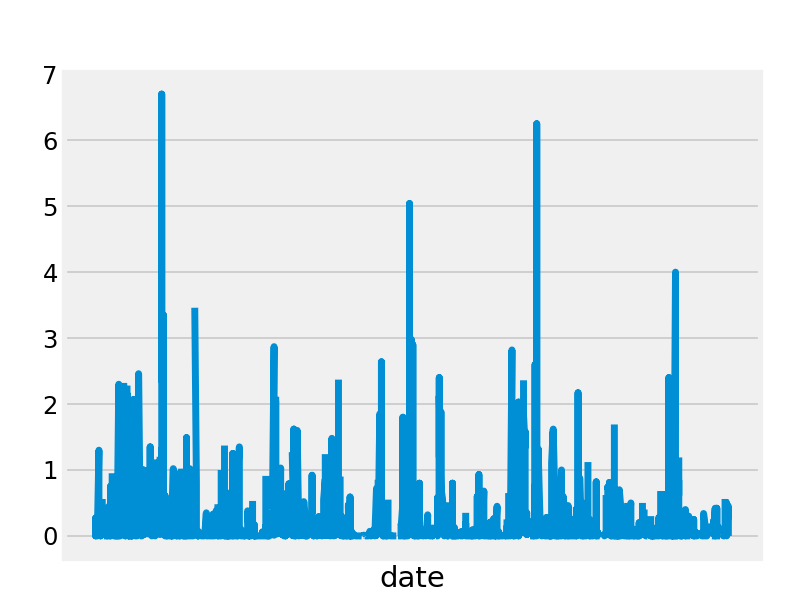

In [90]:
plt.plot(prcp_for_last_12_months_df)
plt.xticks([])
plt.xlabel('date')
plt.show()

In [21]:
prcp_for_last_12_months_df.describe()

,prcp
count,2125.000000
mean,0.178565
std,0.458468
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [91]:
# How many stations are available in this dataset?
number_of_stations=session.query(Station.station).count()
print('There are',number_of_stations,'Stations.')

There are 9 Stations.


In [92]:
# What are the most active stations? 'USC00519281'and 'USC00519397'
# List the stations and the counts in descending order.
#Which station has the highest number of observations? 'USC00519281'

Measurement = schema.classes.measurement
Station = schema.classes.station

for row in session.query(Station.station,
                        func.count(Measurement.tobs))\
    .filter(Station.station == Measurement.station)\
    .group_by(Station.station)\
    .order_by(func.count(Measurement.tobs).desc()):
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [93]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with `bins=12`.
last_12=(datetime.datetime.now() - datetime.timedelta(days=365))
last_12=last_12.strftime("%Y-%m-%d")
tobs_for_last_12_months=session.query(Measurement.date,
                                      Station.station,
                                      Measurement.tobs)\
                                     .filter(Measurement.date >= last_12)\
                                     .filter(Station.station =='USC00519281')\
                                     .order_by(Measurement.date.desc()).all()

In [94]:
tobs_for_last_12_months_df=pd.DataFrame(tobs_for_last_12_months)

<IPython.core.display.Javascript object>


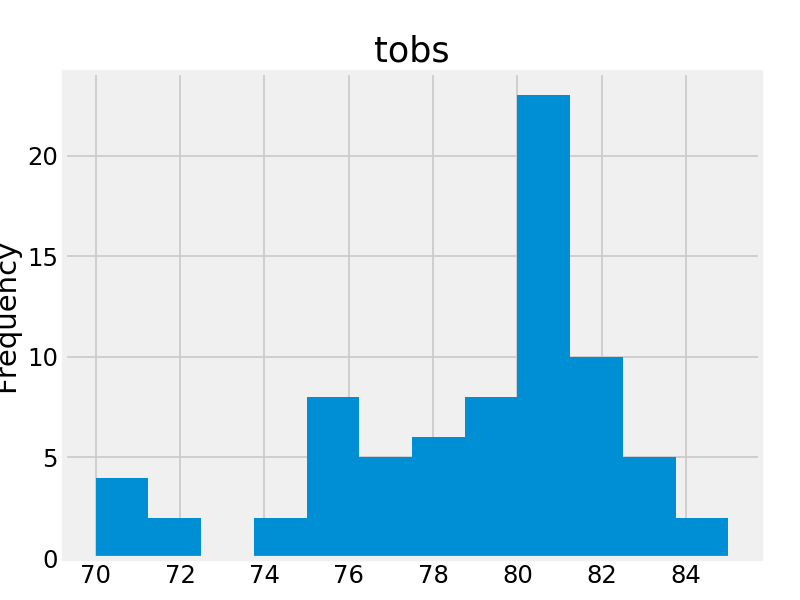

In [97]:
tobs_for_last_12_months_df.hist(column='tobs', bins=12)
plt.ylabel('Frequency');

In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [98]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2015-02-28', '2015-03-05'))

[(65.0, 71.5909090909091, 78.0)]


In [99]:
result=session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= '2015-02-28').filter(Measurement.date <= '2015-03-05').all()

TripAvgTemp=list({x: 1 for x in result[0]}.keys())[1] # the trip avg temprature.
print('Average Temprature for the trip as',"{0:.2f}".format(TripAvgTemp))

Average Temprature for the trip as 71.59


<IPython.core.display.Javascript object>


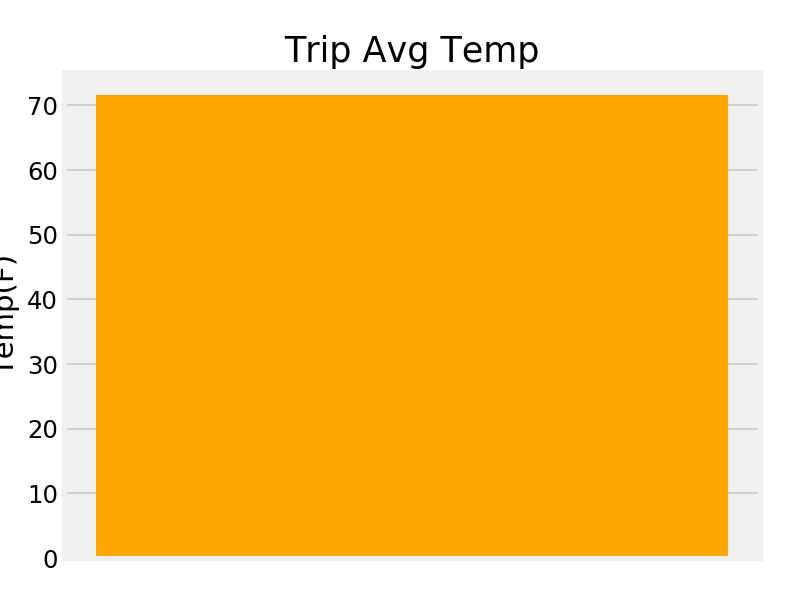

In [100]:
fig, ax  = plt.subplots()
ax.bar([2], [TripAvgTemp], color='orange',width=2, align='center')
plt.title('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.xticks([])
ax.yaxis.grid(True)
plt.show();

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")